In [14]:
########################################################
# Plot_Newton2_CircularMotion
#
# This notebook calculates the two sides of Newton's 
# second law for circular motion, and plots them on the
# same axis against trial number. 
#
#
########################################################
#### -------------- IMPORT BLOCK ------------------ ####
# In this section we import important Python packages. #

import numpy as np # NumPy, a numerical Python package, is used for representing numerical data
import matplotlib.pyplot as plt # Matplotlib, a Python plotting package, is used for plotting data. 
import matplotlib
font = {'size'   : 12}

matplotlib.rc('font', **font)

In [15]:
### -------(!!!) INPUT DATA (!!!) ----------- ###
### You may change these variables as needed. ###

# The input data section takes two forms: position or acceleration,
# depending on your experimental design. Your TA should have let you
# know which file to be using.

# YOUR_NAME:
#
# Your name. This will help distinguish your plots.
NAME = "Emily Tyhurst"

# DATA_FILENAME:
#
# The name of the file containing your circular motion data.
# 
# Your file should be a comma-separated value file with the
# following colums:
#
# Trial #, Period (s), Radius (m), Force (N), Angle (deg) 
#
DATA_FILENAME="data_circular.csv"  


# ANGLE_FORM:
#
# For your last column, you inputted an angle measurement. According to
# the following diagram, which angle did you measure?
#
#   -------------------------------------------- (CEILING)
#                        *
#                        -  *
#                        - T   * 
#                        -        *
#                        -           *
#                        -              *
#                        -              A  *
#                        - - - - - - - - -(AIRPLANE)
#                        
#                        

ANGLE_FORM = "T" # Enter T for theta, the angle from the vertical. Enter A for Alpha, the angle from the horizontal.


In [16]:
#### ------------- DATA LOAD BLOCK ------------------- ####
# In this section we import CSV files from your Practical #
# and load them into NumPy arrays.                        #

# Use NumPy to load the data from the CSV file
all_data = np.genfromtxt(DATA_FILENAME, delimiter=',', comments='#',skip_header=True)

# Separate the data into position and time 
trial=  all_data[:,0] # trial number
period = all_data[:,1] # period in s
radius = all_data[:,2] # radius in m
tension = all_data[:,3] # force in N
angle = all_data[:,4] # angle in deg

# Calculate the RHS of Newton's Second Law for Circular Motion (force)

if (ANGLE_FORM== "T"):
    mass = (tension*np.cos(angle*np.pi/180))/9.8
elif (ANGLE_FORM== "A"):
    mass = (tension*np.sin(angle*np.pi/180))/9.8
else:
    print("Please enter T or A for your angle form.")
    
speed_c= 2*np.pi*radius/period

RHS = speed_c**2/radius*mass

# Calculate the LHS of Newton's Second Law for Circular Motion (force)

if (ANGLE_FORM== "T"):
    LHS = np.sin(angle*np.pi/180)*tension
elif (ANGLE_FORM== "A"):
    LHS = np.cos(angle*np.pi/180)*tension
else:
    print("ERROR. Please enter T or A for your angle form.")



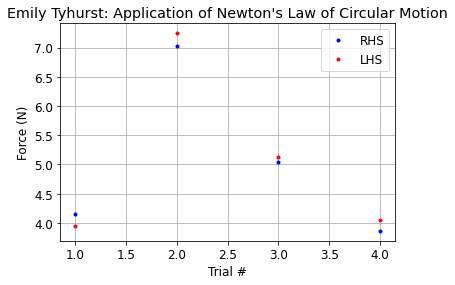

<Figure size 432x288 with 0 Axes>

In [17]:
#### ------------- PLOTTING BLOCK ------------------- ####
# In this section we plot the data from your experiment. #
# Here we are plotting the force of the two sides.  #

plt.plot(trial, RHS, 'b.', label="RHS")
plt.plot(trial, LHS, 'r.', label= "LHS")
plt.title(NAME+": Application of Newton's Law of Circular Motion")
plt.xlabel("Trial #")
plt.ylabel("Force (N)")
plt.grid()
plt.legend()
plt.savefig(NAME.replace(" ","_")+"_Newton_Circular_Data.png")
plt.show()
plt.clf()


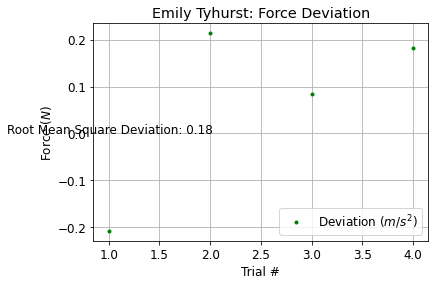

In [18]:
#### ---------- DEVIATION BLOCK ---------- ####
# In this section we compare the data from your experiment #
# to determine more precisely if the hypothesis is true.   #

rmsd_motion= np.sqrt(np.mean((LHS-RHS)**2))

plt.plot(trial, LHS- RHS, 'g.', label="Deviation $(m/s^2)$")
plt.text(0,0, "Root Mean Square Deviation: {:.2f}".format(rmsd_motion))
plt.title(NAME+": Force Deviation")
plt.xlabel("Trial #")
plt.ylabel("Force $(N)$")
plt.grid()
plt.legend()
plt.savefig(NAME.replace(" ","_")+"_Circular_Motion_Deviation.png")
plt.show()
